In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# BluePatcher

In [ ]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=Warning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset load

### Features
| Up packets | Up packets | Up packets         | Up packets | Up packets | Up packets | Up packets | Up packets | Up bytes | Up bytes | Up bytes           | Up bytes | Up bytes | Up bytes | Up bytes | Up bytes | Down packets | Down packets | Down packets       | Down packets | Down packets | Down packets | Down packets | Down packets | Down bytes | Down bytes | Down bytes         | Down bytes | Down bytes | Down bytes | Down bytes | Down bytes |
|------------|------------|--------------------|------------|------------|------------|------------|------------|----------|----------|--------------------|----------|----------|----------|----------|----------|--------------|--------------|--------------------|--------------|--------------|--------------|--------------|--------------|------------|------------|--------------------|------------|------------|------------|------------|------------|
| V0         | V1         | V2                 | V3         | V4         | V5         | V6         | V7         | V8       | V9       | V10                | V11      | V12      | V13      | V14      | V15      | V16          | V17          | V18                | V19          | V20          | V21          | V22          | V23          | V24        | V25        | V26                | V27        | V28        | V29        | V30        | V31        |
| average    | median     | standard deviation | skewness   | 75         | 90         | 95         | 98         | average  | median   | standard deviation | skewness | 75       | 90       | 95       | 98       | average      | median       | standard deviation | skewness     | 75           | 90           | 95           | 98           | average    | median     | standard deviation | skewness   | 75         | 90         | 95         | 98         |


In [ ]:
clean_data = np.loadtxt("features/clean_features.dat")
val_data = np.loadtxt("features/val_features.dat")
test_data = np.loadtxt("features/test_features.dat")

### Print functions

In [ ]:
def showChart(dataset1, dataset2, dataset3, label1, label2, label3, xlabel, ylabel, title, metric):
    # Get smaller length
    length = min(len(dataset1[:, metric]), len(dataset2[:, metric]), len(dataset3[:, metric]))

    # Plot datasets
    plt.plot(dataset1[:length, metric], label=label1)
    plt.plot(dataset2[:length, metric], label=label2)
    plt.plot(dataset3[:length, metric], label=label3)

    # Add legends
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

In [ ]:
def showAnoms(dataset, listOfOutliers, xlabel, ylabel, title):
    # Plot dataset
    plt.scatter(dataset[:, 0], dataset[:, 1], marker = "x")
    
    # Plot anoms
    plt.scatter(dataset[listOfOutliers,0], dataset[listOfOutliers, 1], facecolors = 'none', edgecolors = 'r')

    # Add legends
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
def show2D(dataset1, dataset2, dataset3, xlabel, ylabel, metric0, metric1):
    plt.figure(figsize=(10,4))

    plt.subplot(1, 3, 1)
    plt.scatter(dataset1[:, metric0], dataset1[:, metric1], marker="x")
    plt.title("Xtrain (only normal ex.)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(1, 3, 2)
    plt.scatter(dataset2[:, metric0], dataset2[:, metric1], marker="x")
    plt.title("Xval (normal&abnormal ex.)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.subplot(1, 3, 3)
    plt.scatter(dataset3[:, metric0], dataset3[:, metric1], marker="x")
    plt.title("Xtest (normal&abnormal ex.)")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [ ]:
def histo(dataset, label0, label1, metric0, metric1, nbuckets):
    # Feature 0
    plt.subplot(1, 2, 1)
    plt.title(label0)
    plt.hist(dataset[:, metric0], nbuckets, density=1, facecolor='g')

    # Feature 1
    plt.subplot(1,2,2)
    plt.title(label1)
    plt.hist(dataset[:, metric1], nbuckets, density=1, facecolor='g')

In [ ]:
def histo_eng(dataset, label0, label1, metric0, metric1, nbuckets):
    # Feature 0
    plt.subplot(1, 2, 1)
    plt.title(label0)
    plt.hist(np.log(np.clip(dataset[:, metric0], a_min=0.00001, a_max=None)), nbuckets, density=1, facecolor='g')

    # Feature 1
    plt.subplot(1,2,2)
    plt.title(label1)
    plt.hist(np.log(np.clip(dataset[:, metric1], a_min=0.00001, a_max=None)), nbuckets, density=1, facecolor='g')

In [ ]:
def histo_eng_anom(dataset0, dataset1, label0, label1, metric0, metric1, nbuckets):
    # Feature 0
    plt.subplot(1, 2, 1)
    plt.title(label0)

    # Clean
    plt.hist(np.log(np.clip(dataset0[:, metric0], a_min=0.00001, a_max=None)), nbuckets, density=1, facecolor='black')

    # Anom
    plt.hist(np.log(np.clip(dataset1[:, metric0], a_min=0.00001, a_max=None)), nbuckets, density=1, facecolor='r')

    # Feature 1
    plt.subplot(1,2,2)
    plt.title(label1)

    # Clean
    plt.hist(np.log(np.clip(dataset0[:, metric1], a_min=0.00001, a_max=None)), nbuckets, density=1, facecolor='black')

    # Anom
    plt.hist(np.log(np.clip(dataset1[:, metric0], a_min=0.00001, a_max=None)), nbuckets, density=1, facecolor='r')

## Average

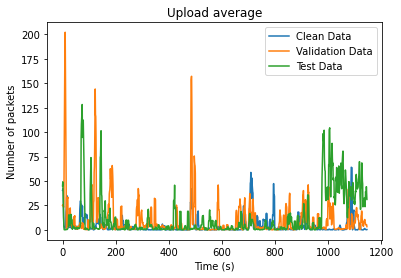

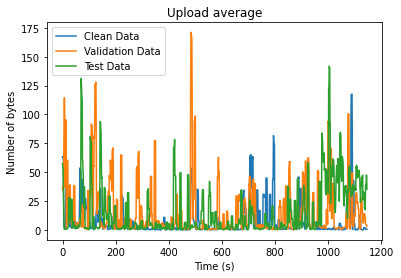

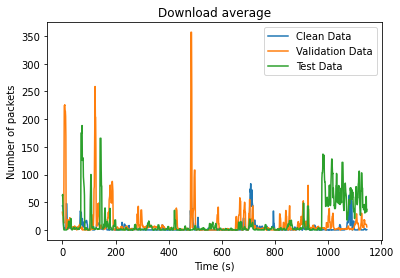

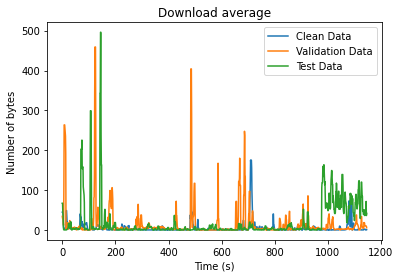

In [ ]:
showChart(clean_data, val_data, test_data, "Clean Data", "Validation Data", "Test Data", "Time (s)", "Number of packets", "Upload average", 0)
showChart(clean_data, val_data, test_data, "Clean Data", "Validation Data", "Test Data", "Time (s)", "Number of bytes", "Upload average", 8)
showChart(clean_data, val_data, test_data, "Clean Data", "Validation Data", "Test Data", "Time (s)", "Number of packets", "Download average", 16)
showChart(clean_data, val_data, test_data, "Clean Data", "Validation Data", "Test Data", "Time (s)", "Number of bytes", "Download average", 24)

## 2D Features
| Up packets | Up packets | Up packets         | Up packets | Up packets | Up packets | Up packets | Up packets | Up bytes | Up bytes | Up bytes           | Up bytes | Up bytes | Up bytes | Up bytes | Up bytes | Down packets | Down packets | Down packets       | Down packets | Down packets | Down packets | Down packets | Down packets | Down bytes | Down bytes | Down bytes         | Down bytes | Down bytes | Down bytes | Down bytes | Down bytes |
|------------|------------|--------------------|------------|------------|------------|------------|------------|----------|----------|--------------------|----------|----------|----------|----------|----------|--------------|--------------|--------------------|--------------|--------------|--------------|--------------|--------------|------------|------------|--------------------|------------|------------|------------|------------|------------|
| V0         | V1         | V2                 | V3         | V4         | V5         | V6         | V7         | V8       | V9       | V10                | V11      | V12      | V13      | V14      | V15      | V16          | V17          | V18                | V19          | V20          | V21          | V22          | V23          | V24        | V25        | V26                | V27        | V28        | V29        | V30        | V31        |
| average    | median     | standard deviation | skewness   | 75         | 90         | 95         | 98         | average  | median   | standard deviation | skewness | 75       | 90       | 95       | 98       | average      | median       | standard deviation | skewness     | 75           | 90           | 95           | 98           | average    | median     | standard deviation | skewness   | 75         | 90         | 95         | 98         |

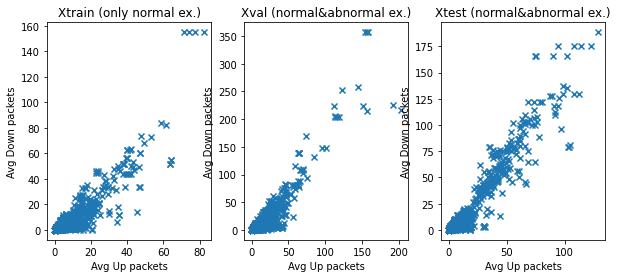

In [ ]:
show2D(clean_data, val_data, test_data, "Avg Up packets", "Avg Down packets", 0, 16)

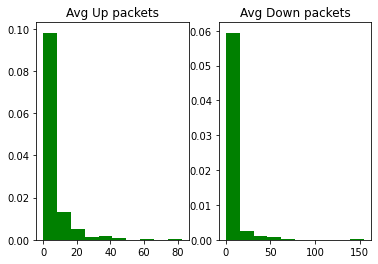

In [ ]:
histo(clean_data, "Avg Up packets", "Avg Down packets", 0, 16, 10)

## Feature Engineering

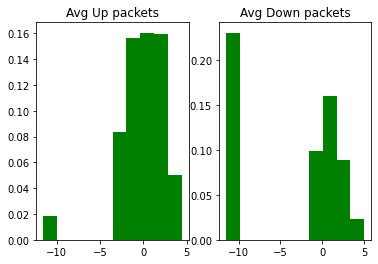

In [ ]:
histo_eng(clean_data, "Avg Up packets", "Avg Down packets", 0, 16, 10)

In [ ]:
Xtrain = np.log(np.clip(np.array(clean_data[:,[0, 16]]), a_min=0.00001, a_max=None))

## Comparisson

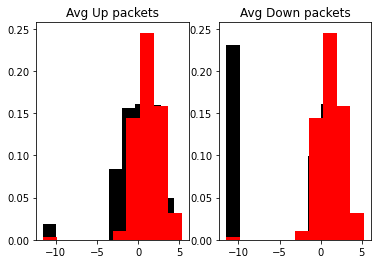

In [ ]:
histo_eng_anom(clean_data, val_data, "Avg Up packets", "Avg Down packets", 0, 16, 10)

## Gaussian Distribution

In [ ]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    # number of examples in X
    m = X.shape[0]
    
    # compute mean
    mu = np.mean(X, axis=0)
     
    # compute variance =sigma^2
    sigma2 = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,sigma2

In [ ]:
# Estimate parameters (mean and variance) for the Gaussian model of the normal data (Xtrain)

mu, sigma2 = estimateGaussian(Xtrain)
print("mu: ", mu)
print("sigma2: ", sigma2)

mu:  [-0.02332439 -3.69696273]
sigma2:  [ 7.07376256 38.82417484]


## Multivariate Gaussian Distribution

In [ ]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate Gaussian distribution.
    """
    n= n = X.shape[1] #number of features 
    sigma_diag=np.diag(sigma2)  #Diagonal matrix (features are independent !!!!)
    X = X - mu.T
    p = 1/((2*np.pi)**(n/2)*(np.linalg.det(sigma_diag)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma_diag) * X,axis=1))
    return p

## Threshold selection

In [ ]:
def selectThreshold(yval, pval):
    """
    Find the best threshold (epsilon) to use for selecting outliers
    """
    best_epi = 0
    best_F1 = 0
    
    #range of threshold values to decide the best one. 
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        
        #compute true positive (TP)
        tp = np.sum(predictions[yval==1]==1)
        tn = np.sum(predictions[yval==0]==0)
        
        #compute false positive (FP)
        fp = np.sum(predictions[yval==0]==1)
        
        #compute false negative 
        fn = np.sum(predictions[yval==1]==0)
        
        try:
        # compute precision, recall and F1
            prec = tp/(tp+fp)
            
            #compute recall and F1
            rec = tp/(tp+fn)
            #compute  F1
            F1 = (2*prec*rec)/(prec+rec) 
        
            if F1 > best_F1:
                best_F1 =F1
                best_epi = epi
            
        except ZeroDivisionError:
                print('Warning dividing by zero!!')  
        
    return best_epi, best_F1

In [ ]:
Xval = np.log(np.clip(np.array(val_data[:,[0, 16]]), a_min=0.00001, a_max=None))
yval = val_data[:,32]



(1687, 2)


In [ ]:
#Apply multivariateGaussian to compute the probability of the examples in Xval. 
pval = multivariateGaussian(Xval, mu, sigma2)

#Apply selectThreshold to compute the best epsilon and best F1 with the validation data
epsilon, F1 = selectThreshold(yval, pval)

print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 0.0016846418016633349
Best F1 on Cross Validation Set: 0.15126050420168066


In [ ]:
def findIndices(binVec):
    l = []
    for i in range(len(binVec)):
        if binVec[i] == 1:
            l.append(i)
    return l

In [ ]:
Xtest = np.log(np.clip(np.array(test_data[:,[0, 16]]), a_min=0.00001, a_max=None))

In [ ]:
#Apply multivariateGaussian to detect abnormal examples (outliers) 
p = multivariateGaussian(Xtest, mu, sigma2)

outl = (p < epsilon)
listOfOutliers=findIndices(outl)
count_outliers = len(listOfOutliers)
print('Number of outliers (Xtest):', count_outliers)
print("Number of outliers (yval):", yval.sum())

Number of outliers (Xtest): 138
Number of outliers (yval): 45.0


## Visualize the anomalies

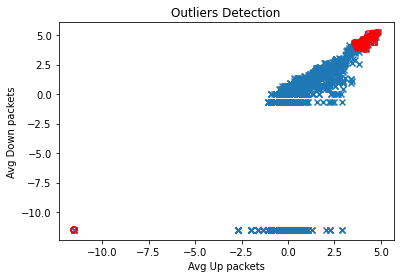

In [ ]:
showAnoms(Xtest, listOfOutliers, "Avg Up packets", "Avg Down packets", "Outliers Detection")

## Accuracy

In [ ]:
def calcAccuracy(yval, listOfOutliers):
    return yval[listOfOutliers].sum() / len(listOfOutliers)

In [ ]:
print(f"Accuracy: {calcAccuracy(yval, listOfOutliers)*100:.2f} %")


Accuracy: 0.72 %
